In [230]:
import math, random, pylab, numpy as np, os

global acceptance ratio: 0.4466


<function matplotlib.pyplot.show(close=None, block=None)>

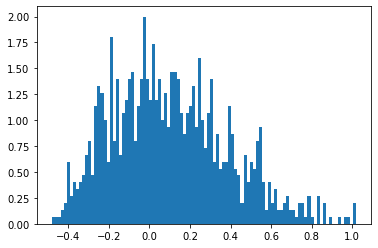

In [217]:
def prob(x):
    s1 = math.exp(-(x + 1.2) ** 2 / 0.72)
    s2 = math.exp(-(x - 1.5) ** 2 / 0.08)
    return (s1 + 2.0 * s2) / math.sqrt(2.0 * math.pi)
hist=[]
for i in range (1000):
    delta = 9.65
    nsteps = 10000
    acc_tot = 0
    acc_tmp = 0

    x = 0.0
    x_av = 0.0
    for step in range(nsteps):
        xnew = x + random.uniform(-delta, delta)
        if random.uniform(0.0, 1.0) < prob(xnew) / prob(x):
            x = xnew
            acc_tmp += 1
            acc_tot += 1
        x_av += x
        if step%100 == 0:
            if acc_tmp>60:
                delta*=1.1
            if acc_tmp<40:
                delta/=1.1
            acc_tmp = 0

    hist.append(x_av / float(nsteps))
    if i%1000==0:
        print ('global acceptance ratio:', acc_tot / float(nsteps))



pylab.hist(hist,bins=100,density=True,label='<x>')
pylab.show

In [213]:
x=np.linspace(-1.0,1.0,100)
y=

nsteps=10,000, delta=0.7360796548831964, <x> = 0.4013048073180522, global acceptance ratio: 0.4305


In [125]:
def V(x, y):
    pot  = -4.0 * x ** 2 - x ** 3 + 4.0 * x ** 4
    pot += -4.0 * y ** 2 - y ** 3 + 4.0 * y ** 4
    return pot

gamma = [0.0025, 0.005, 0.1, 0.25, 0.5, 0.6]


for i in gamma:
    xmin, ymin = 0.807044513157, 0.807044513157
    n_success = 0
    n_runs = 10
    
    for run in range(n_runs):
        T = 4.0
        x, y = 0.0, 0.0
        delta = 0.1
        step = 0
        acc = 0
        while T > 0.00001:
            step += 1
            if step == 100:
                T *= (1.0 - i)
                if acc < 30:
                    delta /= 1.2
                elif acc > 70:
                    delta *= 1.2
                step = 0
                acc = 0
            xnew = x + random.uniform(-delta, delta)
            ynew = y + random.uniform(-delta, delta)
            if abs(xnew) < 1.0 and abs(ynew) < 1.0 and \
               random.uniform(0.0, 1.0) < math.exp(- (V(xnew, ynew) - V(x, y)) / T):
                x = xnew
                y = ynew
                acc += 1
        if math.sqrt((x - xmin) ** 2 + (y - ymin) ** 2) < 0.1:
            n_success += 1
    print (i, '\t', n_success / float(n_runs))


0.0025 	 1.0
0.005 	 0.9
0.1 	 0.7
0.25 	 0.4
0.5 	 0.2
0.6 	 0.1


In [232]:
def unit_sphere():
    x = [random.gauss(0.0, 1.0) for i in range(3)]
    norm =  math.sqrt(sum(xk ** 2 for xk in x))
    return [xk / norm for xk in x]

def minimum_distance(positions, N):
    dists = [math.sqrt(sum((positions[k][j] - positions[l][j]) ** 2 \
             for j in range(3))) for l in range(N) for k in range(l)]
    return min(dists)

def resize_disks(positions, r, N, gamma):
    Upsilon = minimum_distance(positions, N) / 2.0
    r = r + gamma * (Upsilon - r)
    return r

N = 19
gamma  = 0.05
min_density = 0.78
for run in range(10):
    print ('run', run)
    sigma  = 0.25
    r = 0.0
    positions = [unit_sphere() for j in range(N)]
    n_acc = 0
    step = 0
    while sigma > 1.e-8:
        step += 1
        if step % 500000 == 0:
            eta = N / 2.0 * (1.0 - math.sqrt(1.0 - r ** 2))
            print (r, eta, sigma, acc_rate)
        k = random.randint(0, N - 1)
        newpos = [positions[k][j] + random.gauss(0, sigma) for j in range(3)]
        norm = math.sqrt(sum(xk ** 2 for xk in newpos))
        newpos = [xk / norm for xk in newpos]
        new_min_dist = min([math.sqrt(sum((positions[l][j] - newpos[j]) ** 2 \
                       for j in range(3))) for l in list(range(k)) + list(range(k + 1, N))])
        if new_min_dist > 2.0 * r:
            positions = positions[:k] + [newpos] + positions[k + 1:]
            n_acc += 1
        if step % 100 == 0:
            acc_rate = n_acc / float(100)
            n_acc = 0
            if acc_rate < 0.2:
                sigma *= 0.5
            elif acc_rate > 0.8 and sigma < 0.5:
                sigma *= 2.0
            r = resize_disks(positions, r, N, gamma)
            R = 1.0 / (1.0 / r - 1.0)
            eta = 1.0 * N / 2.0 * (1.0 - math.sqrt(1.0 - r ** 2))
    print ('final density: %f (gamma = %f)' % (eta, gamma))
    if eta > min_density:
        f = open('N_' + str(N) + '_final_'+ str(eta) + '.txt', 'w')
        for a in positions:
           f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + '\n')
        f.close()

run 0
0.4040029176266615 0.8098018871799972 0.000244140625 0.42
0.4041379755908638 0.8103686599574325 2.384185791015625e-07 0.45
final density: 0.810369 (gamma = 0.050000)
run 1
0.40407616174327093 0.8101092291184676 0.000244140625 0.42
0.404271018346263 0.8109271972663208 3.814697265625e-06 0.38
0.40427324007589976 0.8109365263506281 2.9802322387695312e-08 0.33
final density: 0.810937 (gamma = 0.050000)
run 2
0.40408816376582546 0.810159597531794 0.000244140625 0.4
0.40427879638872977 0.8109598576804339 4.76837158203125e-07 0.39
final density: 0.810961 (gamma = 0.050000)
run 3
0.4040208059124364 0.8098769426327823 0.000244140625 0.43
0.4041761496832651 0.8105288991529651 1.9073486328125e-06 0.31
0.40417781999728886 0.8105359108598025 5.960464477539063e-08 0.28
final density: 0.810536 (gamma = 0.050000)
run 4
0.40410684402397395 0.8102379957894263 0.000244140625 0.45
0.40427874919063794 0.8109596594908706 4.76837158203125e-07 0.47
final density: 0.810961 (gamma = 0.050000)
run 5
0.4039

In [231]:
def dist(a, b):
    return math.sqrt(sum((a[k] - b[k]) ** 2 for k in range(3)))

N, eta_opt = 15, 0.80731

d_ref = math.sqrt(1.0 - (1.0 - 2.0 * eta_opt / float(N)) ** 2) * 2.0
mypath = os.getcwd()   # current working directory, where the data files are
files = [f for f in sorted(os.listdir(mypath)) if f[0:4] == 'N_%i' % N if f.endswith('.txt')]
for filename in files:
    print  ('====================', filename, '====================')
    # read file
    f = open(filename, 'r')
    pos = []
    for line in f:
        a, b, c = line.split()
        pos.append([float(a), float(b), float(c)])
    f.close()
    # check contacts and connectivities
    contacts = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        for j in range(i):
            if dist(pos[i], pos[j]) < d_ref * 1.0001:
                contacts[i][j] = 1
                contacts[j][i] = 1
    connectivity = [sum(contacts[i]) for i in range(N)]
    for j in range(N):
        print ('disk %2i [connectivity %i] is connected with ' % (j, connectivity[j]),)
        print (' '.join(['%2i [%i],' % (k, connectivity[k]) for k in range(N) if contacts[j][k]]))
    print()

==================== N_15_final_0.8014742083647184.txt ====================
disk  0 [connectivity 2] is connected with 
10 [5], 12 [3],
disk  1 [connectivity 3] is connected with 
 8 [3], 12 [3], 14 [4],
disk  2 [connectivity 3] is connected with 
 5 [3],  6 [4], 14 [4],
disk  3 [connectivity 5] is connected with 
 4 [3],  8 [3],  9 [2], 10 [5], 13 [4],
disk  4 [connectivity 3] is connected with 
 3 [5],  6 [4], 13 [4],
disk  5 [connectivity 3] is connected with 
 2 [3], 11 [3], 12 [3],
disk  6 [connectivity 4] is connected with 
 2 [3],  4 [3],  7 [3], 14 [4],
disk  7 [connectivity 3] is connected with 
 6 [4], 11 [3], 13 [4],
disk  8 [connectivity 3] is connected with 
 1 [3],  3 [5], 10 [5],
disk  9 [connectivity 2] is connected with 
 3 [5], 14 [4],
disk 10 [connectivity 5] is connected with 
 0 [2],  3 [5],  8 [3], 11 [3], 13 [4],
disk 11 [connectivity 3] is connected with 
 5 [3],  7 [3], 10 [5],
disk 12 [connectivity 3] is connected with 
 0 [2],  1 [3],  5 [3],
disk 13 [connect

0 7.834921953111391
77 7.292388593359672
2282 6.777298600213236
26218 6.45646968977998
137498 6.15246813356818
747272 6.10705812290602


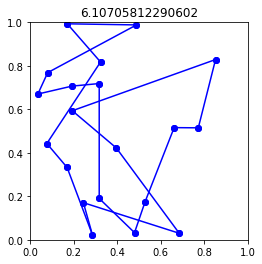

In [235]:
def dist(x, y):
    return math.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

def tour_length(cities, N):
    return sum(dist(cities[k + 1], cities[k]) for k in range(N - 1)) + dist(cities[0], cities[N - 1])

N = 20
random.seed(54321)
cities = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)) for i in range(N)]
random.seed()
energy_min = float('inf')
for sample in range(1000000):
    random.shuffle(cities)
    energy =  tour_length(cities, N)
    if energy < energy_min:
        print (sample, energy)
        energy_min = energy
        new_cities = cities[:]
cities = new_cities[:]
for i in range(1,N):
    pylab.plot([cities[i][0], cities[i - 1][0]], [cities[i][1], cities[i - 1][1]], 'bo-')
pylab.plot([cities[0][0], cities[N - 1][0]], [cities[0][1], cities[N - 1][1]], 'bo-')
pylab.title(str(energy_min))
pylab.axis('scaled')
pylab.axis([0.0, 1.0, 0.0, 1.0])
pylab.savefig('plot_tsp_direct_sampling_N' + str(N) + '_energy' + str(energy_min) + '.png')
pylab.show()

10.152823369595948 0 1.0
5.098791167930356 100000 0.1119692808597481
4.4099851614792 200000 0.05514652099233673
3.9550838760963827 300000 0.033489752950489
3.955083876096384 400000 0.021700241695030195
3.9822399383611535 500000 0.014273003866974528
3.955083876096384 600000 0.009529374199901772
3.9550838760963836 700000 0.006330635621649677
3.955083876096383 800000 0.00426902244701463
3.955083876096383 900000 0.002893181113400987


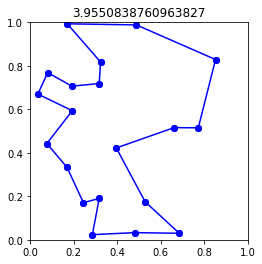

In [236]:
def dist(x, y):
    return math.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

def tour_length(cities, N):
    return sum(dist(cities[k + 1], cities[k]) for k in range(N - 1)) + dist(cities[0], cities[N - 1])

N = 20
random.seed(54321)
cities = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)) for i in range(N)]
random.seed()
random.shuffle(cities)
beta = 1.0
n_accept = 0
best_energy = float('inf')
energy =  tour_length(cities, N)
for step in range(1000000):
    if n_accept == 100:
        beta *=  1.005
        n_accept = 0
    p = random.uniform(0.0, 1.0)
    if p  < 0.2:
        i = random.randint(0, N / 2)
        cities = cities[i:] + cities[:i]
        i = random.randint(0, N / 2)
        a = cities[:i]
        a.reverse()
        new_cities =  a + cities[i:]
    elif p < 0.6:
        new_cities = cities[:]
        i = random.randint(1, N - 1)
        a = new_cities.pop(i)
        j = random.randint(1, N - 2)
        new_cities.insert(j, a)
    else:
        new_cities = cities[:]
        i = random.randint(1, N - 1)
        j = random.randint(1, N - 1)
        new_cities[i] = cities[j]
        new_cities[j] = cities[i]
    new_energy =  tour_length(new_cities, N)
    if random.uniform(0.0, 1.0) < math.exp(- beta * (new_energy - energy)):
        n_accept += 1
        energy = new_energy
        cities = new_cities[:]
        if energy < best_energy:
           best_energy = energy
           best_tour = cities[:]
    if step % 100000 == 0:
        print (energy, step, 1.0 / beta)

cities = best_tour[:]
for i in range(1, N):
    pylab.plot([cities[i][0], cities[i - 1][0]], [cities[i][1], cities[i - 1][1]], 'bo-')
pylab.plot([cities[0][0], cities[N - 1][0]], [cities[0][1], cities[N - 1][1]], 'bo-')
pylab.title(str(best_energy))
pylab.axis('scaled')
pylab.axis([0.0, 1.0, 0.0, 1.0])
pylab.savefig('plot_tsp_simulated_annealing_N' + str(N) + '_energy' + str(best_energy) + '.png')
pylab.show()